In [1]:
# Get image from user or use a default image
# Show the different edge operator to the user
# Users should be able to choose any edge operator of interest

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sobel_edge_detector(image):
    # Apply the sobel edge detector
    sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    # Combine the gradient images
    sobel_combined = cv.magnitude(sobelx, sobely)
    return np.uint8(sobel_combined)

In [4]:
def perwitt_edge_detector(image):
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    # Apply Prewitt edge detection
    perwitt_x = cv.filter2D(image, -1, kernel_x)
    perwitt_y = cv.filter2D(image, -1, kernel_y)
    perwitt_combined = np.sqrt(np.square(perwitt_x) + np.square(perwitt_y))
    return np.uint8(perwitt_combined)

In [5]:
def roberts_edge_detector(image):
    image = cv.GaussianBlur(image, (3, 3), 0)
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Apply Roberts edge detection
    roberts_x = cv.filter2D(image, -1, kernel_x)
    roberts_y = cv.filter2D(image, -1, kernel_y)
    roberts_combined = np.sqrt(np.square(roberts_x) + np.square(roberts_y))
    return np.uint8(roberts_combined)

In [6]:
def laplacian_edge_detector(image):
    # Apply the laplacian edge detector
    laplacian = cv.Laplacian(image, cv.CV_64F)
    laplacian = cv.convertScaleAbs(laplacian)
    return laplacian

In [7]:
def canny_edge_detector(image):
    # Apply the canny edge detector
    canny = cv.Canny(image, 100, 200)
    return canny

In [8]:
# Get the image from the user
image_url = input("Enter the image URL( or use default image): ")
if image_url == "":
    image_url = 'img/benin_head.jpg'


print("""
Choose the edge operator of interest:
1. Sobel
2. Prewitt
3. Roberts
4. Canny
5. Laplacian

Enter the number of the edge operator:
                              """)


Choose the edge operator of interest:
1. Sobel
2. Prewitt
3. Roberts
4. Canny
5. Laplacian

Enter the number of the edge operator:
                              


In [9]:
choosen_edge_operator = int(input("Enter the number of the edge operator: "))

In [10]:
# Load image
image = cv.imread(image_url, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (400, 400))

In [11]:
edge_image = None
if choosen_edge_operator == 1:
    edge_image = sobel_edge_detector(image)
elif choosen_edge_operator == 2:
    edge_image = perwitt_edge_detector(image)
elif choosen_edge_operator == 3:
    edge_image = roberts_edge_detector(image)
elif choosen_edge_operator == 4:
    edge_image = canny_edge_detector(image)
elif choosen_edge_operator == 5:
    edge_image = laplacian_edge_detector(image)

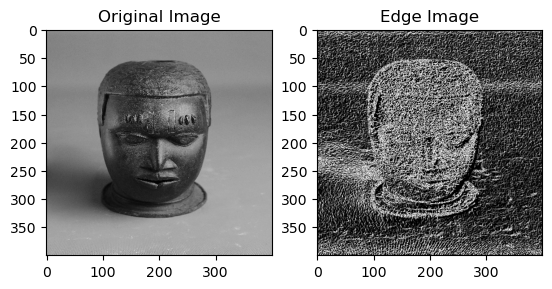

In [12]:
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edge Image')
plt.imshow(edge_image, cmap='gray')